In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [29]:
battery_temp = pd.read_csv('../Data/BatteryTemperature.csv', parse_dates=[0], index_col=0, names=["timestamp", "battery_temp"])
battery_temp

,battery_temp
timestamp,
2004-02-13 15:00:00,3.832011
2004-02-13 16:00:00,3.382078
2004-02-13 17:00:00,3.848675
2004-02-13 18:00:00,3.645655
2004-02-13 19:00:00,3.542035
...,...
2018-10-02 19:00:00,0.593578
2018-10-02 20:00:00,0.593578
2018-10-02 21:00:00,0.593578


In [30]:
wheel_rpm = pd.read_csv('../Data/WheelRPM.csv', parse_dates=[0], index_col=0, names=["timestamp", "wheel_rpm"])
wheel_rpm 

,wheel_rpm
timestamp,
2009-05-22 22:30:00,1266.527199
2009-05-22 22:35:00,1267.382818
2009-05-22 22:40:00,1267.260905
2009-05-22 22:45:00,1267.305787
2009-05-22 22:50:00,1267.859010
...,...
2018-10-02 18:05:00,0.000000
2018-10-02 18:10:00,0.000000
2018-10-02 18:15:00,0.000000


In [31]:
battery_temp = pd.read_csv('../Data/BatteryTemperature.csv', parse_dates=[0], index_col=0, names=["timestamp", "battery_temp"])
bus_voltage = pd.read_csv('../Data/BusVoltage.csv', parse_dates=[0], index_col=0, names=["timestamp", "bus_voltage"])
bus_current = pd.read_csv('../Data/TotalBusCurrent.csv', parse_dates=[0], index_col=0, names=["timestamp", "bus_current"])
wheel_rpm = pd.read_csv('../Data/WheelRPM.csv', parse_dates=[0], index_col=0, names=["timestamp", "wheel_rpm"])
wheel_temp = pd.read_csv('../Data/WheelTemperature.csv', parse_dates=[0], index_col=0, names=["timestamp", "wheel_temp"])


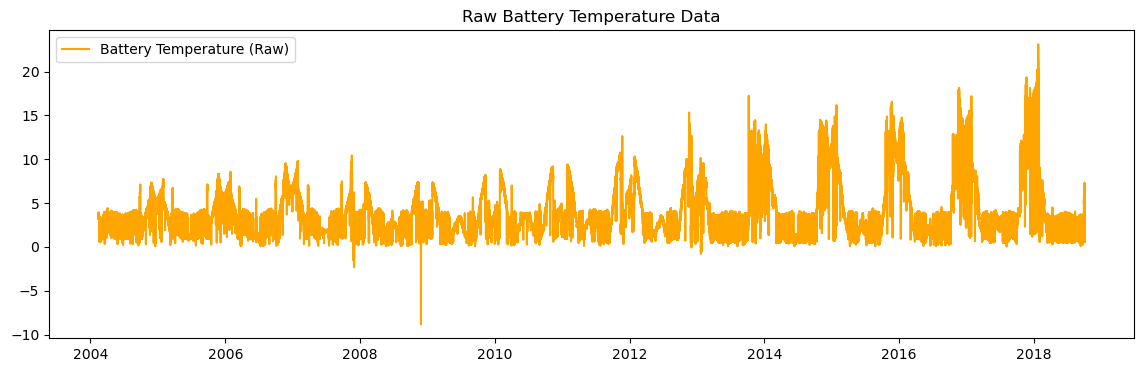

In [32]:
plt.figure(figsize=(14,4))
plt.plot(battery_temp.index, battery_temp['battery_temp'], label='Battery Temperature (Raw)', color='orange')
plt.title('Raw Battery Temperature Data')
plt.legend()
plt.show()

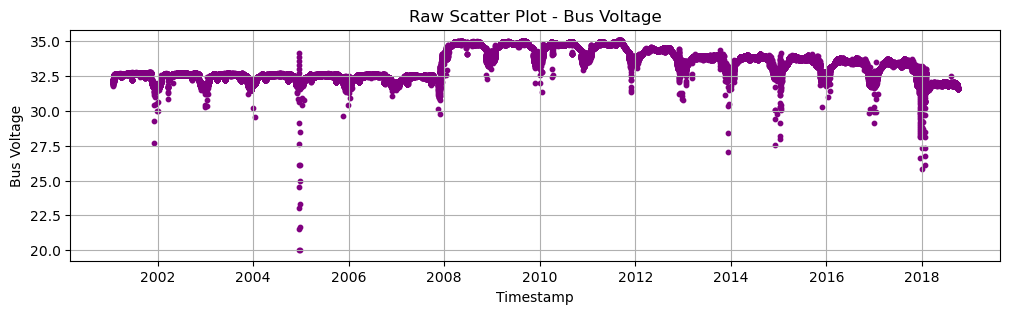

In [33]:
plt.figure(figsize=(12,3))
plt.scatter(bus_voltage.index, bus_voltage['bus_voltage'], color='purple', s=10)  # 's' is size of dots
plt.title('Raw Scatter Plot - Bus Voltage')
plt.xlabel('Timestamp')
plt.ylabel('Bus Voltage')
plt.grid(True)
plt.show()

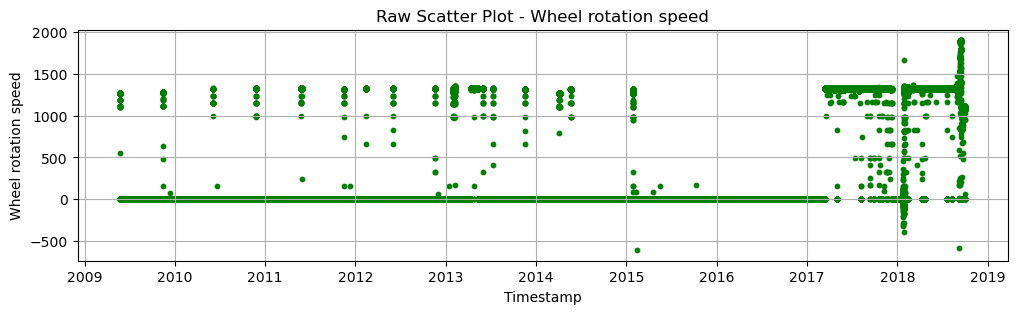

In [34]:
plt.figure(figsize=(12,3))
plt.scatter(wheel_rpm.index, wheel_rpm['wheel_rpm'], color='green', s=10)  # 's' is size of dots
plt.title('Raw Scatter Plot - Wheel rotation speed')
plt.xlabel('Timestamp')
plt.ylabel('Wheel rotation speed')
plt.grid(True)
plt.show()

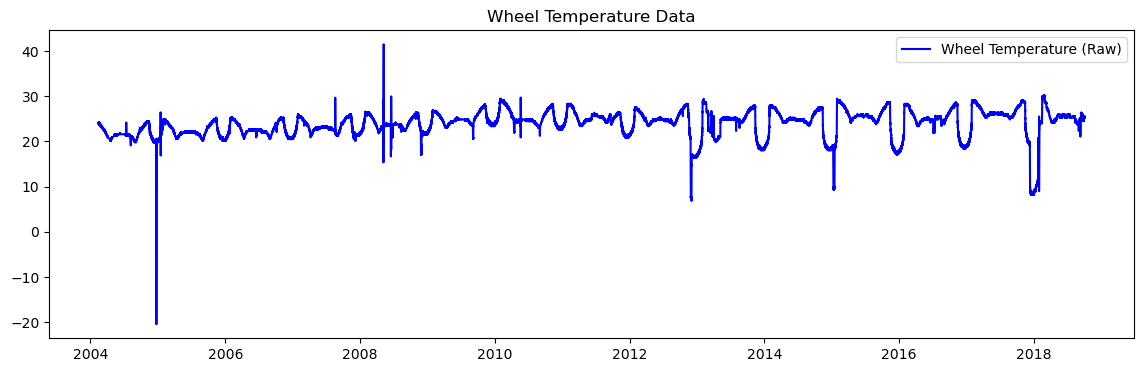

In [35]:
plt.figure(figsize=(14,4))
plt.plot(wheel_temp.index, wheel_temp['wheel_temp'], label='Wheel Temperature (Raw)', color='blue')
plt.title('Wheel Temperature Data')
plt.legend()
plt.show()

In [36]:
battery_temp = battery_temp.resample('1H').mean()
bus_voltage = bus_voltage.resample('3H').mean()
bus_current = bus_current.resample('1D').mean()
wheel_rpm = wheel_rpm.resample('5min').mean()
wheel_temp = wheel_temp.resample('10min').mean()


C:\Users\vansh\AppData\Local\Temp\ipykernel_13520\3578456289.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  battery_temp = battery_temp.resample('1H').mean()
C:\Users\vansh\AppData\Local\Temp\ipykernel_13520\3578456289.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  bus_voltage = bus_voltage.resample('3H').mean()


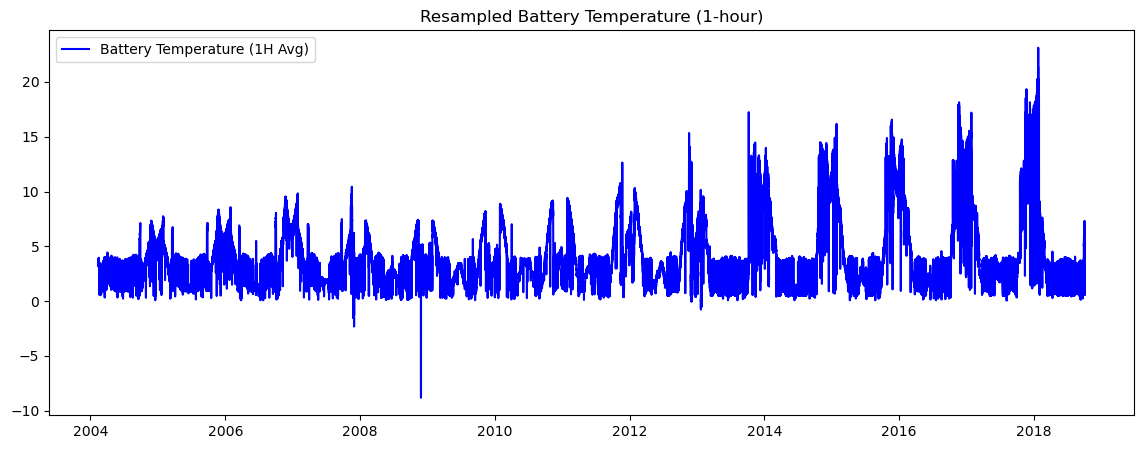

In [37]:
plt.figure(figsize=(14,5))
plt.plot(battery_temp.index, battery_temp['battery_temp'], label='Battery Temperature (1H Avg)', color='blue')
plt.title('Resampled Battery Temperature (1-hour)')
plt.legend()
plt.show()

In [12]:
def create_features(df, colname):
    df[f'{colname}_rolling_mean'] = df[colname].rolling(window=5).mean()
    df[f'{colname}_rolling_std'] = df[colname].rolling(window=5).std()
    df[f'{colname}_lag1'] = df[colname].shift(1)
    df[f'{colname}_lag2'] = df[colname].shift(2)
    
    
    for feature in [f'{colname}_rolling_mean', f'{colname}_rolling_std', f'{colname}_lag1', f'{colname}_lag2']:
        df[feature] = df[feature].fillna(df[feature].mean())
    
    return df

In [38]:
battery_temp = create_features(battery_temp, 'battery_temp')
bus_voltage = create_features(bus_voltage, 'bus_voltage')
bus_current = create_features(bus_current, 'bus_current')
wheel_rpm = create_features(wheel_rpm, 'wheel_rpm')
wheel_temp = create_features(wheel_temp, 'wheel_temp')


In [39]:
battery_temp

,battery_temp,battery_temp_rolling_mean,battery_temp_rolling_std,battery_temp_lag1,battery_temp_lag2
timestamp,,,,,
2004-02-13 15:00:00,3.832011,3.882270,0.473592,3.882241,3.882267
2004-02-13 16:00:00,3.382078,3.882270,0.473592,3.832011,3.882267
2004-02-13 17:00:00,3.848675,3.882270,0.473592,3.382078,3.832011
2004-02-13 18:00:00,3.645655,3.882270,0.473592,3.848675,3.382078
2004-02-13 19:00:00,3.542035,3.650091,0.197520,3.645655,3.848675
...,...,...,...,...,...
2018-10-02 19:00:00,0.593578,3.463668,2.896662,0.593578,3.375741
2018-10-02 20:00:00,0.593578,2.262876,2.488442,0.593578,0.593578
2018-10-02 21:00:00,0.593578,1.150011,1.244221,0.593578,0.593578


In [40]:
full_data = battery_temp.join([bus_voltage, bus_current, wheel_rpm, wheel_temp], how='outer')
full_data = full_data.interpolate().dropna()

In [41]:
full_data

,battery_temp,battery_temp_rolling_mean,battery_temp_rolling_std,battery_temp_lag1,battery_temp_lag2,bus_voltage,bus_voltage_rolling_mean,bus_voltage_rolling_std,bus_voltage_lag1,bus_voltage_lag2,...,wheel_rpm,wheel_rpm_rolling_mean,wheel_rpm_rolling_std,wheel_rpm_lag1,wheel_rpm_lag2,wheel_temp,wheel_temp_rolling_mean,wheel_temp_rolling_std,wheel_temp_lag1,wheel_temp_lag2
timestamp,,,,,,,,,,,,,,,,,,,,,
2009-05-22 22:30:00,1.873130,1.935616,0.091466,1.988352,1.921194,34.858240,34.860502,0.002936,34.861279,34.861917,...,1266.527199,217.367157,0.690398,217.368900,217.369051,24.486791,24.486791,0.0,24.486791,24.486791
2009-05-22 22:35:00,1.883519,1.935076,0.091371,1.963954,1.944586,34.858383,34.860479,0.002917,34.861039,34.862002,...,1267.382818,217.367157,0.690398,1266.527199,217.369051,24.486791,24.486791,0.0,24.486791,24.486791
2009-05-22 22:40:00,1.893909,1.934536,0.091276,1.939556,1.967978,34.858525,34.860456,0.002897,34.860799,34.862087,...,1267.260905,217.367157,0.690398,1267.382818,1266.527199,24.486791,24.486791,0.0,24.486791,24.486791
2009-05-22 22:45:00,1.904298,1.933996,0.091182,1.915157,1.991371,34.858668,34.860433,0.002878,34.860559,34.862171,...,1267.305787,217.367157,0.690398,1267.260905,1267.382818,24.486791,24.486791,0.0,24.486791,24.486791
2009-05-22 22:50:00,1.914687,1.933455,0.091087,1.890759,2.014763,34.858811,34.860410,0.002858,34.860318,34.862256,...,1267.859010,1267.267144,0.477686,1267.305787,1267.260905,24.486791,24.486791,0.0,24.486791,24.486791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-10-02 23:10:00,0.593578,0.593578,0.000000,0.593578,0.593578,31.536154,31.551993,0.013882,31.552454,31.568716,...,1031.661722,219.876707,454.748095,67.721813,0.000000,25.229268,25.229268,0.0,25.229268,25.229268
2018-10-02 23:20:00,0.593578,0.593578,0.000000,0.593578,0.593578,31.536154,31.551993,0.013882,31.552454,31.568716,...,1031.661722,219.876707,454.748095,67.721813,0.000000,25.229268,25.229268,0.0,25.229268,25.229268
2018-10-02 23:30:00,0.593578,0.593578,0.000000,0.593578,0.593578,31.536154,31.551993,0.013882,31.552454,31.568716,...,1031.661722,219.876707,454.748095,67.721813,0.000000,25.229268,25.229268,0.0,25.229268,25.229268


In [42]:
full_data.corr()

,battery_temp,battery_temp_rolling_mean,battery_temp_rolling_std,battery_temp_lag1,battery_temp_lag2,bus_voltage,bus_voltage_rolling_mean,bus_voltage_rolling_std,bus_voltage_lag1,bus_voltage_lag2,...,wheel_rpm,wheel_rpm_rolling_mean,wheel_rpm_rolling_std,wheel_rpm_lag1,wheel_rpm_lag2,wheel_temp,wheel_temp_rolling_mean,wheel_temp_rolling_std,wheel_temp_lag1,wheel_temp_lag2
battery_temp,1.000000,0.980397,0.134515,0.983516,0.964160,-0.412408,-0.412356,0.318481,-0.405568,-0.405589,...,-0.115381,-0.115446,0.004059,-0.115355,-0.115393,-0.301169,-0.301362,0.254465,-0.301313,-0.301371
battery_temp_rolling_mean,0.980397,1.000000,0.106042,0.989417,0.992538,-0.421750,-0.419199,0.326319,-0.415624,-0.411303,...,-0.117650,-0.117610,0.007171,-0.117585,-0.117562,-0.305066,-0.305157,0.255347,-0.305071,-0.305077
battery_temp_rolling_std,0.134515,0.106042,1.000000,0.127373,0.105402,-0.317083,-0.296124,0.430121,-0.301012,-0.283937,...,0.098219,0.098123,0.053130,0.098089,0.098059,-0.295616,-0.296111,0.026348,-0.295814,-0.296026
battery_temp_lag1,0.983516,0.989417,0.127373,1.000000,0.983517,-0.415017,-0.412890,0.320276,-0.407144,-0.405170,...,-0.115487,-0.115384,0.005276,-0.115374,-0.115327,-0.300835,-0.300808,0.254995,-0.300713,-0.300645
battery_temp_lag2,0.964160,0.992538,0.105402,0.983517,1.000000,-0.416839,-0.413473,0.322108,-0.409575,-0.404933,...,-0.116126,-0.116017,0.007507,-0.116026,-0.115971,-0.300642,-0.300952,0.251370,-0.300774,-0.300916
bus_voltage,-0.412408,-0.421750,-0.317083,-0.415017,-0.416839,1.000000,0.987820,-0.400025,0.983904,0.971476,...,-0.456069,-0.456122,-0.048486,-0.455937,-0.455931,0.351674,0.351721,-0.160642,0.351654,0.351633
bus_voltage_rolling_mean,-0.412356,-0.419199,-0.296124,-0.412890,-0.413473,0.987820,1.000000,-0.401436,0.991117,0.992080,...,-0.460232,-0.460291,-0.048118,-0.460103,-0.460099,0.356766,0.356789,-0.162290,0.356732,0.356697
bus_voltage_rolling_std,0.318481,0.326319,0.430121,0.320276,0.322108,-0.400025,-0.401436,1.000000,-0.404317,-0.401249,...,-0.085076,-0.085080,0.007766,-0.085052,-0.085048,-0.565664,-0.565730,0.148434,-0.565621,-0.565581
bus_voltage_lag1,-0.405568,-0.415624,-0.301012,-0.407144,-0.409575,0.983904,0.991117,-0.404317,1.000000,0.983902,...,-0.455875,-0.455934,-0.046717,-0.455747,-0.455743,0.352458,0.352438,-0.158967,0.352404,0.352347
bus_voltage_lag2,-0.405589,-0.411303,-0.283937,-0.405170,-0.404933,0.971476,0.992080,-0.401249,0.983902,1.000000,...,-0.455684,-0.455742,-0.047798,-0.455556,-0.455552,0.353326,0.353329,-0.160768,0.353281,0.353235


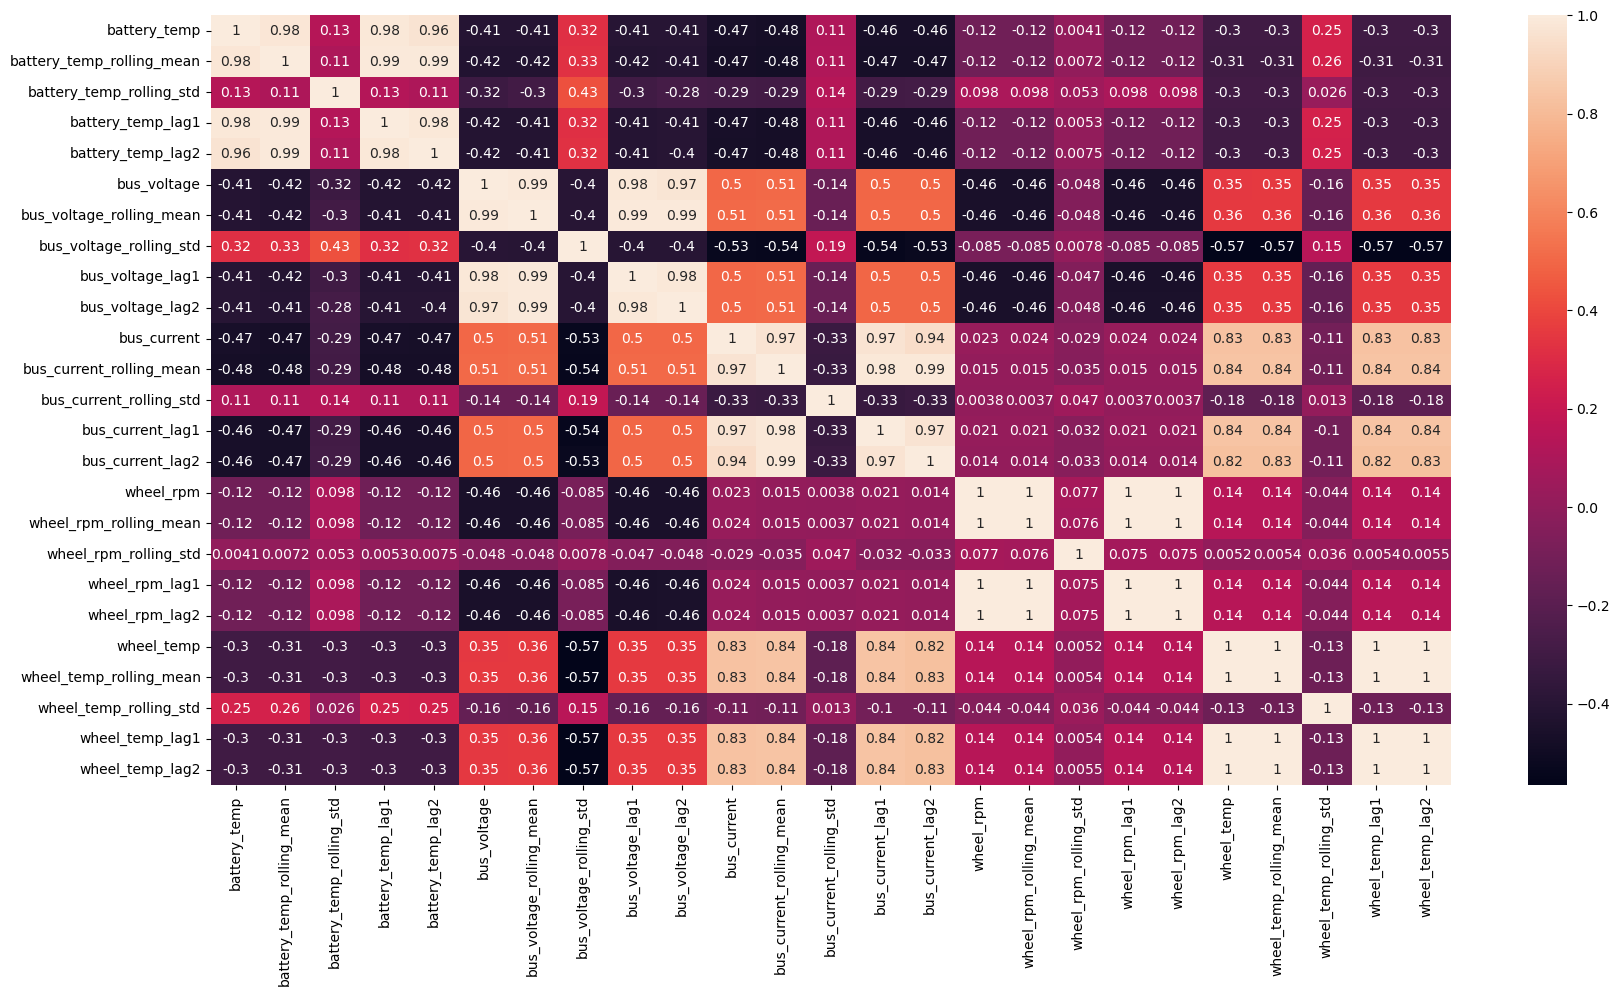

In [43]:
plt.figure(figsize=(20,10))
sns.heatmap(full_data.corr(),annot=True)
plt.show()

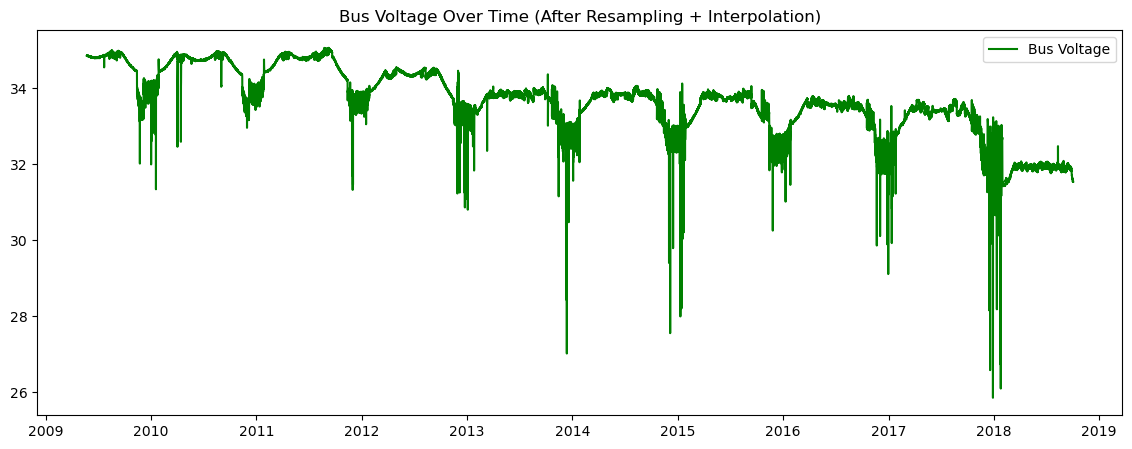

In [44]:
plt.figure(figsize=(14,5))
plt.plot(full_data.index, full_data['bus_voltage'], label='Bus Voltage', color='green')
plt.title('Bus Voltage Over Time (After Resampling + Interpolation)')
plt.legend()
plt.show()

In [20]:
from sklearn.ensemble import IsolationForest

In [45]:
feature_columns = full_data.columns
iso_forest = IsolationForest(contamination=0.01, random_state=42)  # 1% contamination assumed
full_data['anomaly'] = iso_forest.fit_predict(full_data[feature_columns])


In [46]:
anomalies = full_data[full_data['anomaly'] == -1]
anomalies

,battery_temp,battery_temp_rolling_mean,battery_temp_rolling_std,battery_temp_lag1,battery_temp_lag2,bus_voltage,bus_voltage_rolling_mean,bus_voltage_rolling_std,bus_voltage_lag1,bus_voltage_lag2,...,wheel_rpm_rolling_mean,wheel_rpm_rolling_std,wheel_rpm_lag1,wheel_rpm_lag2,wheel_temp,wheel_temp_rolling_mean,wheel_temp_rolling_std,wheel_temp_lag1,wheel_temp_lag2,anomaly
timestamp,,,,,,,,,,,,,,,,,,,,,
2012-11-27 16:55:00,3.054773,3.110034,0.159744,3.124431,2.930798,33.723153,32.927984,0.611623,33.211313,32.968409,...,0.000000,0.000000,0.000000,0.000000,8.012977,8.177698,0.093186,8.196000,8.226504,-1
2012-11-27 17:00:00,3.046544,3.103936,0.155950,3.145287,2.895015,33.746867,32.937700,0.617409,33.208730,32.991663,...,0.000000,0.000000,0.000000,0.000000,7.860458,8.141093,0.159089,8.165496,8.226504,-1
2012-11-27 17:05:00,2.838589,3.061314,0.238935,3.137059,2.915871,33.770581,32.947416,0.623194,33.206148,33.014917,...,0.000000,0.000000,0.000000,0.000000,7.860458,8.104489,0.175036,8.012977,8.196000,-1
2012-11-27 17:25:00,2.006771,2.890825,0.570875,3.104144,2.999295,33.865435,32.986282,0.646335,33.195818,33.107933,...,0.000000,0.000000,0.000000,0.000000,7.860458,7.958070,0.160731,7.860458,7.860458,-1
2012-11-27 18:00:00,0.551089,2.592469,1.151770,3.046544,3.145287,34.031430,33.054296,0.686832,33.177740,33.270710,...,0.000000,0.000000,0.000000,0.000000,8.226504,7.962565,0.160264,8.004950,7.860458,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-28 09:00:00,0.766966,4.986306,4.785189,8.792176,0.940443,32.480000,32.396737,0.115845,32.533618,32.412182,...,1006.197921,280.811785,1308.384176,1144.154062,20.884318,20.937992,0.172993,20.884822,20.804300,-1
2018-01-28 12:20:00,6.996416,4.610093,3.060642,5.221324,3.312314,32.627165,32.473545,0.128024,32.496483,32.527660,...,752.739013,690.417338,1309.042011,1145.068640,21.586001,21.546707,0.044575,21.586001,21.557934,-1
2018-01-28 12:25:00,7.122021,4.596911,3.039831,5.380409,3.471398,32.626868,32.475446,0.126890,32.500604,32.526171,...,1014.969876,571.859010,1309.584412,1309.042011,21.586001,21.556998,0.036706,21.586001,21.571967,-1


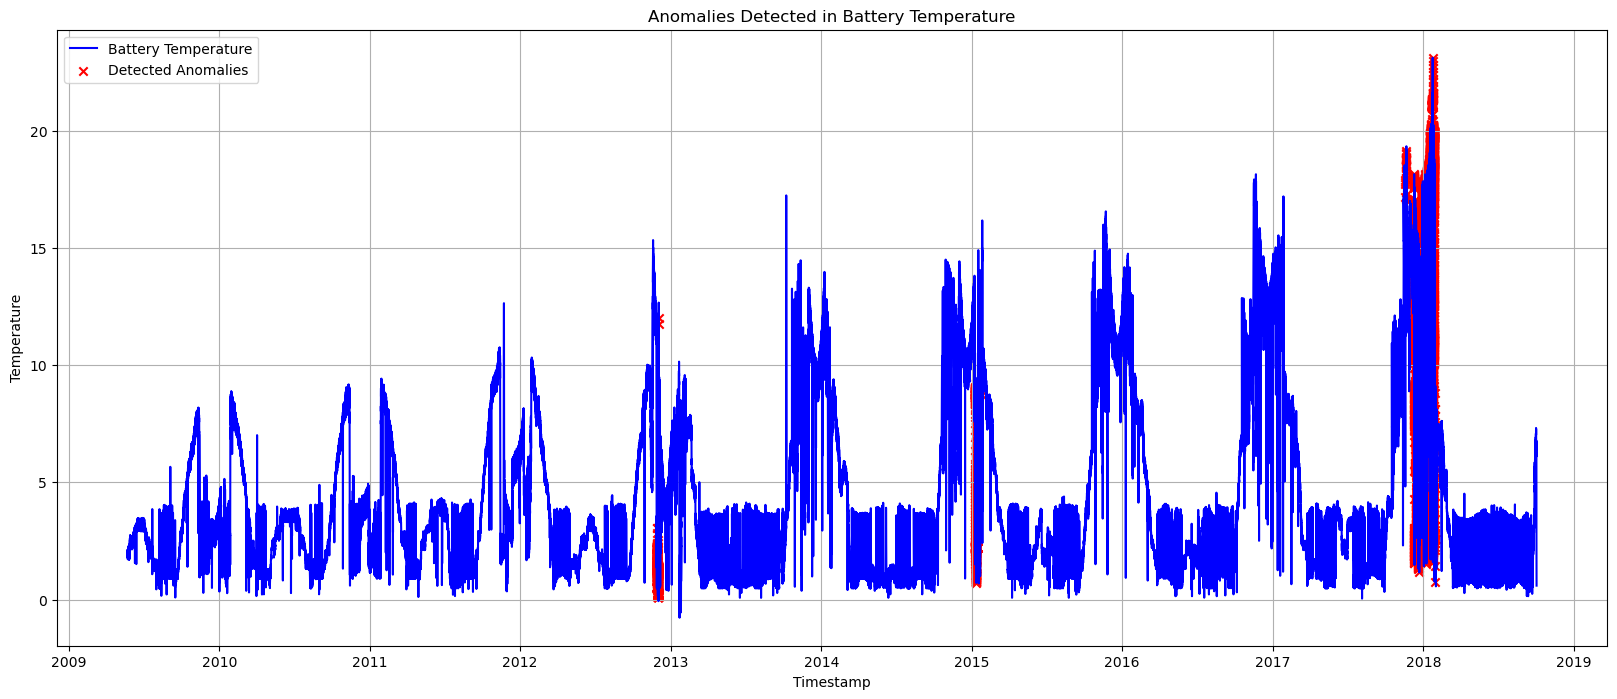

In [47]:
plt.figure(figsize=(20,8))
plt.plot(full_data.index, full_data['battery_temp'], label='Battery Temperature', color='blue')
plt.scatter(anomalies.index, anomalies['battery_temp'], color='red', label='Detected Anomalies', marker='x')
plt.title('Anomalies Detected in Battery Temperature')
plt.xlabel('Timestamp')
plt.ylabel('Temperature')
plt.legend()
plt.grid()
plt.show()

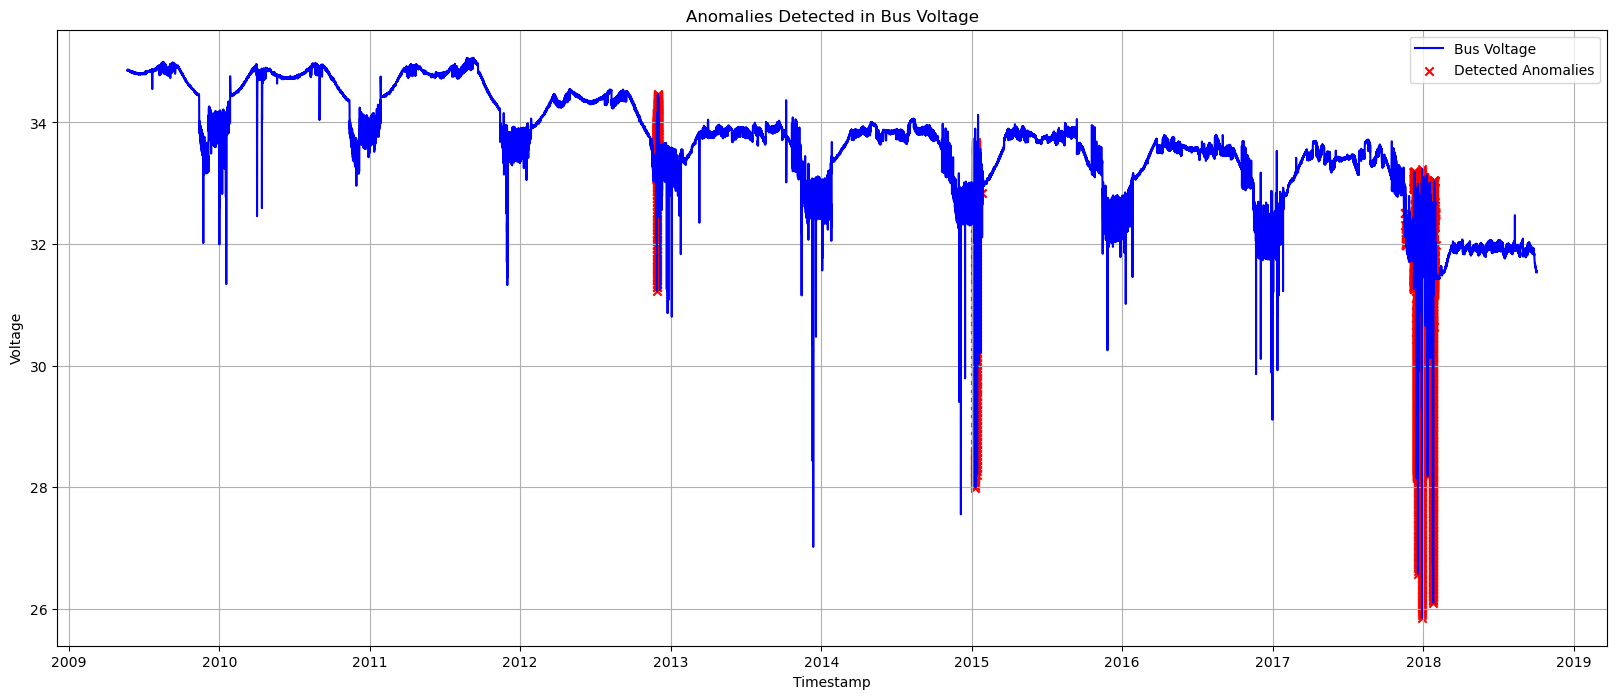

In [48]:
plt.figure(figsize=(20,8))
plt.plot(full_data.index, full_data['bus_voltage'], label='Bus Voltage', color='blue')
plt.scatter(anomalies.index, anomalies['bus_voltage'], color='red', label='Detected Anomalies', marker='x')
plt.title('Anomalies Detected in Bus Voltage')
plt.xlabel('Timestamp')
plt.ylabel('Voltage')
plt.legend()
plt.grid()
plt.show()

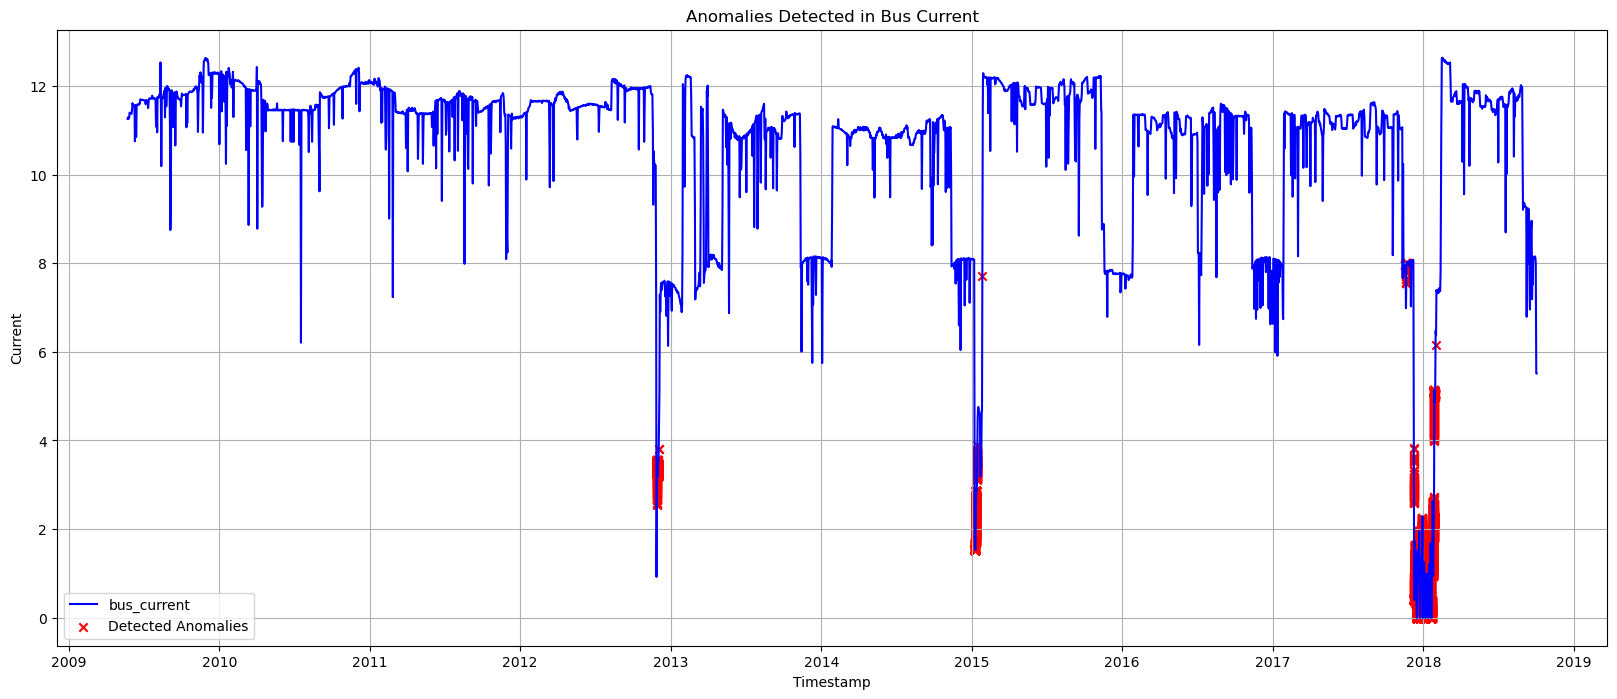

In [49]:
plt.figure(figsize=(20,8))
plt.plot(full_data.index, full_data['bus_current'], label='bus_current', color='blue')
plt.scatter(anomalies.index, anomalies['bus_current'], color='red', label='Detected Anomalies', marker='x')
plt.title('Anomalies Detected in Bus Current')
plt.xlabel('Timestamp')
plt.ylabel('Current')
plt.legend()
plt.grid()
plt.show()

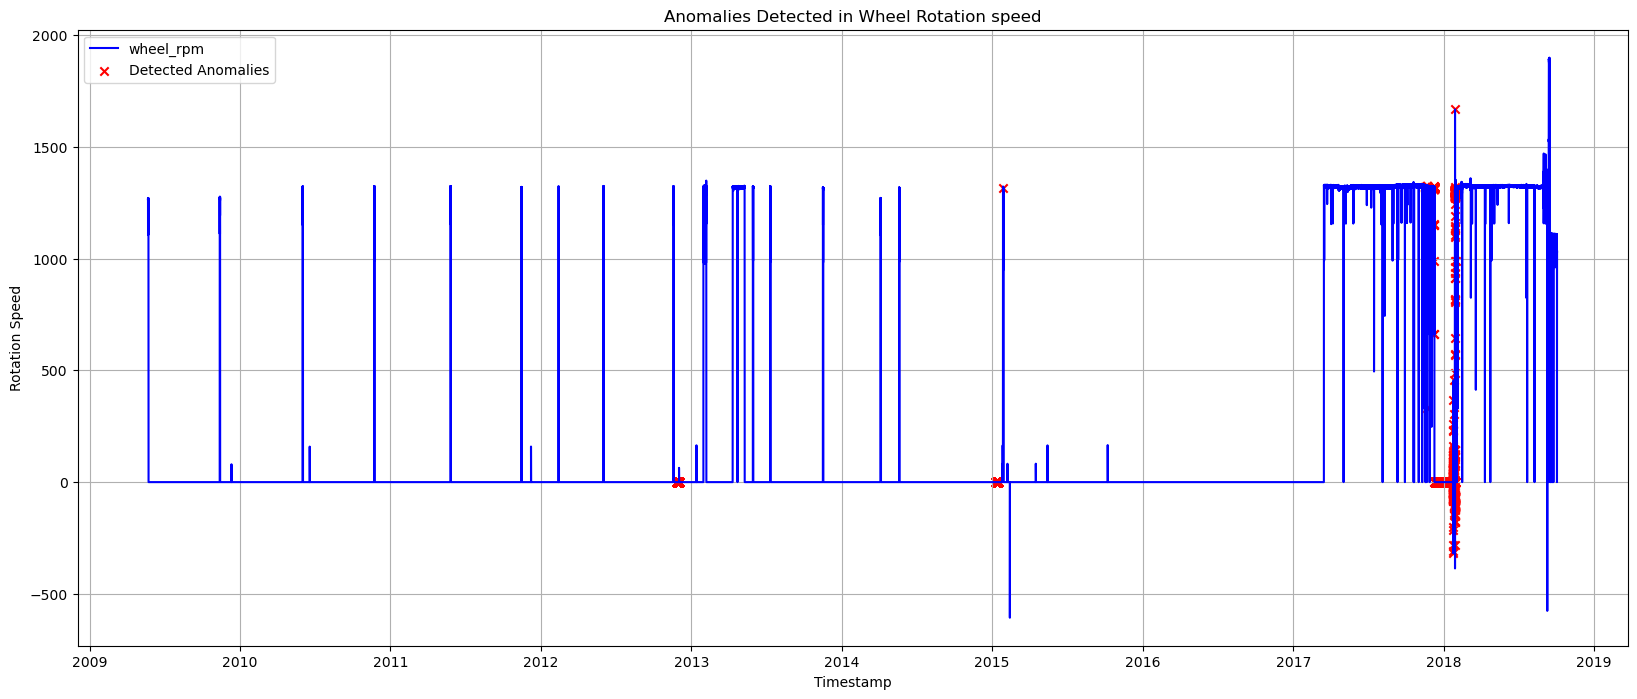

In [50]:
plt.figure(figsize=(20,8))
plt.plot(full_data.index, full_data['wheel_rpm'], label='wheel_rpm', color='blue')
plt.scatter(anomalies.index, anomalies['wheel_rpm'], color='red', label='Detected Anomalies', marker='x')
plt.title('Anomalies Detected in Wheel Rotation speed')
plt.xlabel('Timestamp')
plt.ylabel('Rotation Speed')
plt.legend()
plt.grid()
plt.show()

### Hyperparameter Tuning 

In [27]:
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Define parameter grid
n_estimators_list = [100, 150, 200]
max_samples_list = [0.6, 0.8, 1.0]
contamination_list = [0.005, 0.01, 0.02]

results = []

for n in n_estimators_list:
    for m in max_samples_list:
        for c in contamination_list:
            model = IsolationForest(n_estimators=n, max_samples=m,
                                    contamination=c, random_state=42)
            model.fit(full_data[feature_columns])
            scores = model.decision_function(full_data[feature_columns])
            mean_score = scores.mean()
            results.append({
                'n_estimators': n,
                'max_samples': m,
                'contamination': c,
                'mean_score': mean_score
            })

# Sort results by highest mean anomaly score (more negative = more anomalous)
sorted_results = sorted(results, key=lambda x: x['mean_score'])

# Display top 5 combinations
import pandas as pd
pd.DataFrame(sorted_results[:5])


,n_estimators,max_samples,contamination,mean_score
0,200,1.0,0.02,0.110640
1,100,0.8,0.02,0.111278
2,100,1.0,0.02,0.111473
3,200,0.8,0.02,0.111822
4,150,1.0,0.02,0.112011


In [53]:
feature_columns = full_data.columns
iso_forest = IsolationForest(n_estimators=200,max_samples=1.0,contamination=0.02, random_state=42)  # 1% contamination assumed
full_data['anomaly'] = iso_forest.fit_predict(full_data[feature_columns])


In [54]:
anomalies = full_data[full_data['anomaly'] == -1]
anomalies

,battery_temp,battery_temp_rolling_mean,battery_temp_rolling_std,battery_temp_lag1,battery_temp_lag2,bus_voltage,bus_voltage_rolling_mean,bus_voltage_rolling_std,bus_voltage_lag1,bus_voltage_lag2,...,wheel_rpm_rolling_mean,wheel_rpm_rolling_std,wheel_rpm_lag1,wheel_rpm_lag2,wheel_temp,wheel_temp_rolling_mean,wheel_temp_rolling_std,wheel_temp_lag1,wheel_temp_lag2,anomaly
timestamp,,,,,,,,,,,,,,,,,,,,,
2009-05-22 22:30:00,1.873130,1.935616,0.091466,1.988352,1.921194,34.858240,34.860502,0.002936,34.861279,34.861917,...,217.367157,0.690398,217.368900,217.369051,24.486791,24.486791,0.0,24.486791,24.486791,-1
2009-05-22 22:35:00,1.883519,1.935076,0.091371,1.963954,1.944586,34.858383,34.860479,0.002917,34.861039,34.862002,...,217.367157,0.690398,1266.527199,217.369051,24.486791,24.486791,0.0,24.486791,24.486791,-1
2009-05-22 22:40:00,1.893909,1.934536,0.091276,1.939556,1.967978,34.858525,34.860456,0.002897,34.860799,34.862087,...,217.367157,0.690398,1267.382818,1266.527199,24.486791,24.486791,0.0,24.486791,24.486791,-1
2009-05-22 22:45:00,1.904298,1.933996,0.091182,1.915157,1.991371,34.858668,34.860433,0.002878,34.860559,34.862171,...,217.367157,0.690398,1267.260905,1267.382818,24.486791,24.486791,0.0,24.486791,24.486791,-1
2009-05-22 22:50:00,1.914687,1.933455,0.091087,1.890759,2.014763,34.858811,34.860410,0.002858,34.860318,34.862256,...,1267.267144,0.477686,1267.305787,1267.260905,24.486791,24.486791,0.0,24.486791,24.486791,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-10-02 23:10:00,0.593578,0.593578,0.000000,0.593578,0.593578,31.536154,31.551993,0.013882,31.552454,31.568716,...,219.876707,454.748095,67.721813,0.000000,25.229268,25.229268,0.0,25.229268,25.229268,-1
2018-10-02 23:20:00,0.593578,0.593578,0.000000,0.593578,0.593578,31.536154,31.551993,0.013882,31.552454,31.568716,...,219.876707,454.748095,67.721813,0.000000,25.229268,25.229268,0.0,25.229268,25.229268,-1
2018-10-02 23:30:00,0.593578,0.593578,0.000000,0.593578,0.593578,31.536154,31.551993,0.013882,31.552454,31.568716,...,219.876707,454.748095,67.721813,0.000000,25.229268,25.229268,0.0,25.229268,25.229268,-1


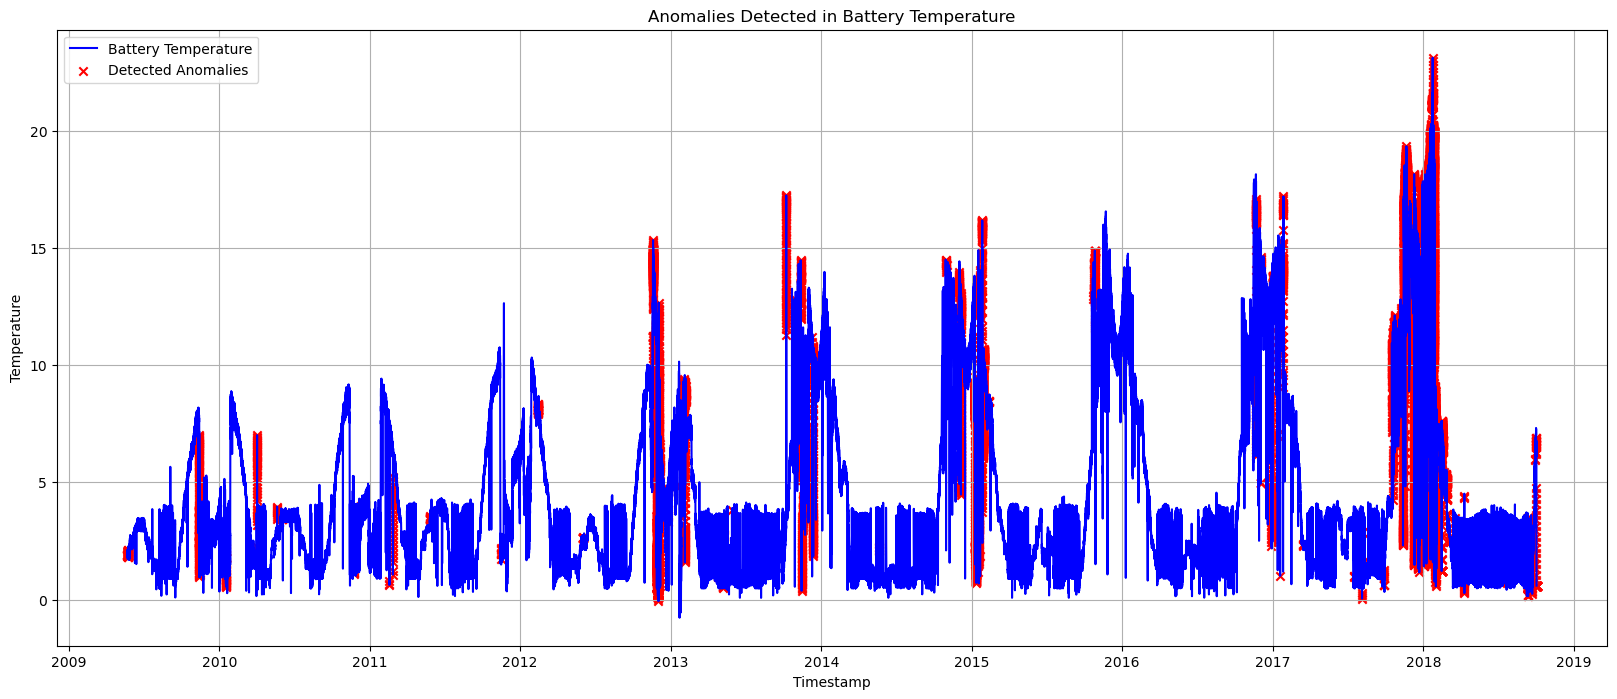

In [55]:
plt.figure(figsize=(20,8))
plt.plot(full_data.index, full_data['battery_temp'], label='Battery Temperature', color='blue')
plt.scatter(anomalies.index, anomalies['battery_temp'], color='red', label='Detected Anomalies', marker='x')
plt.title('Anomalies Detected in Battery Temperature')
plt.xlabel('Timestamp')
plt.ylabel('Temperature')
plt.legend()
plt.grid()
plt.show()

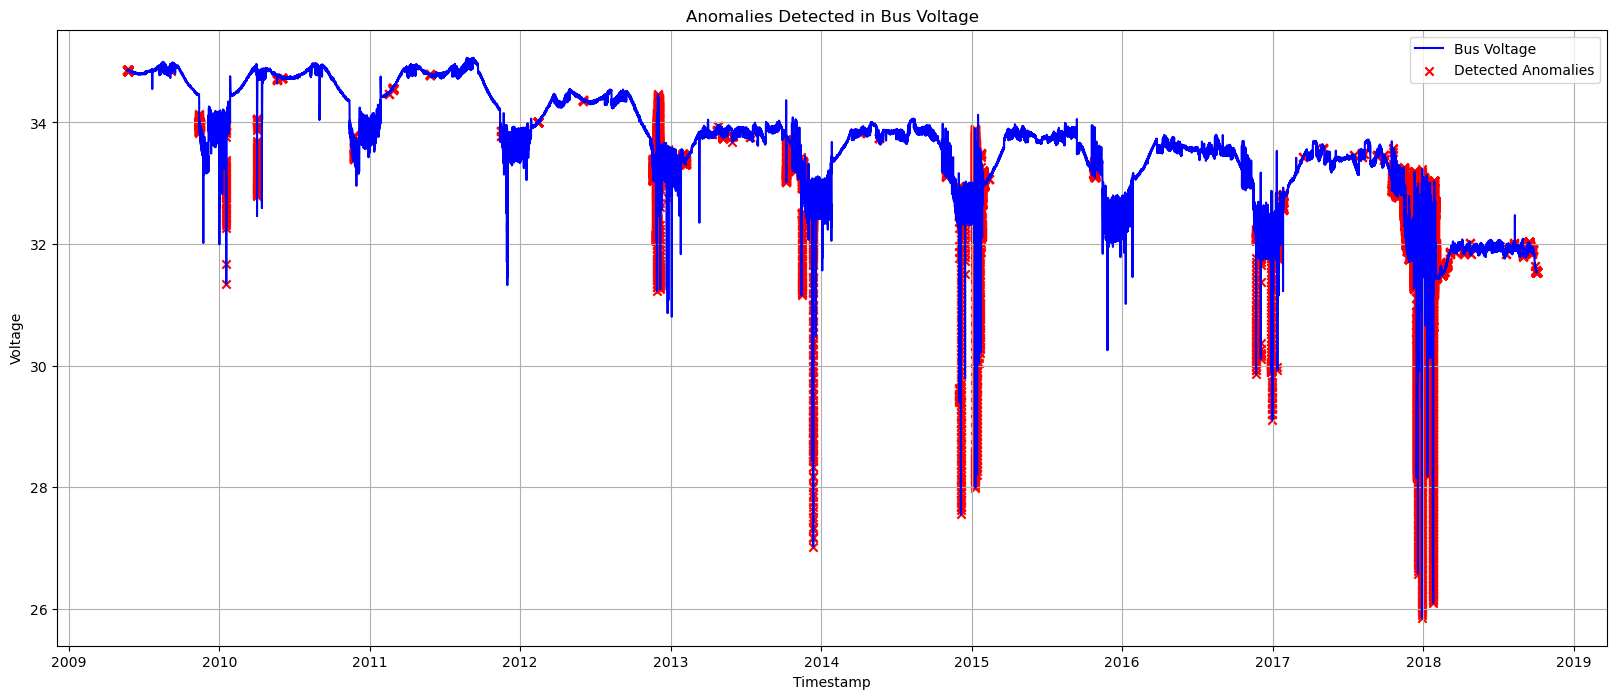

In [56]:
plt.figure(figsize=(20,8))
plt.plot(full_data.index, full_data['bus_voltage'], label='Bus Voltage', color='blue')
plt.scatter(anomalies.index, anomalies['bus_voltage'], color='red', label='Detected Anomalies', marker='x')
plt.title('Anomalies Detected in Bus Voltage')
plt.xlabel('Timestamp')
plt.ylabel('Voltage')
plt.legend()
plt.grid()
plt.show()

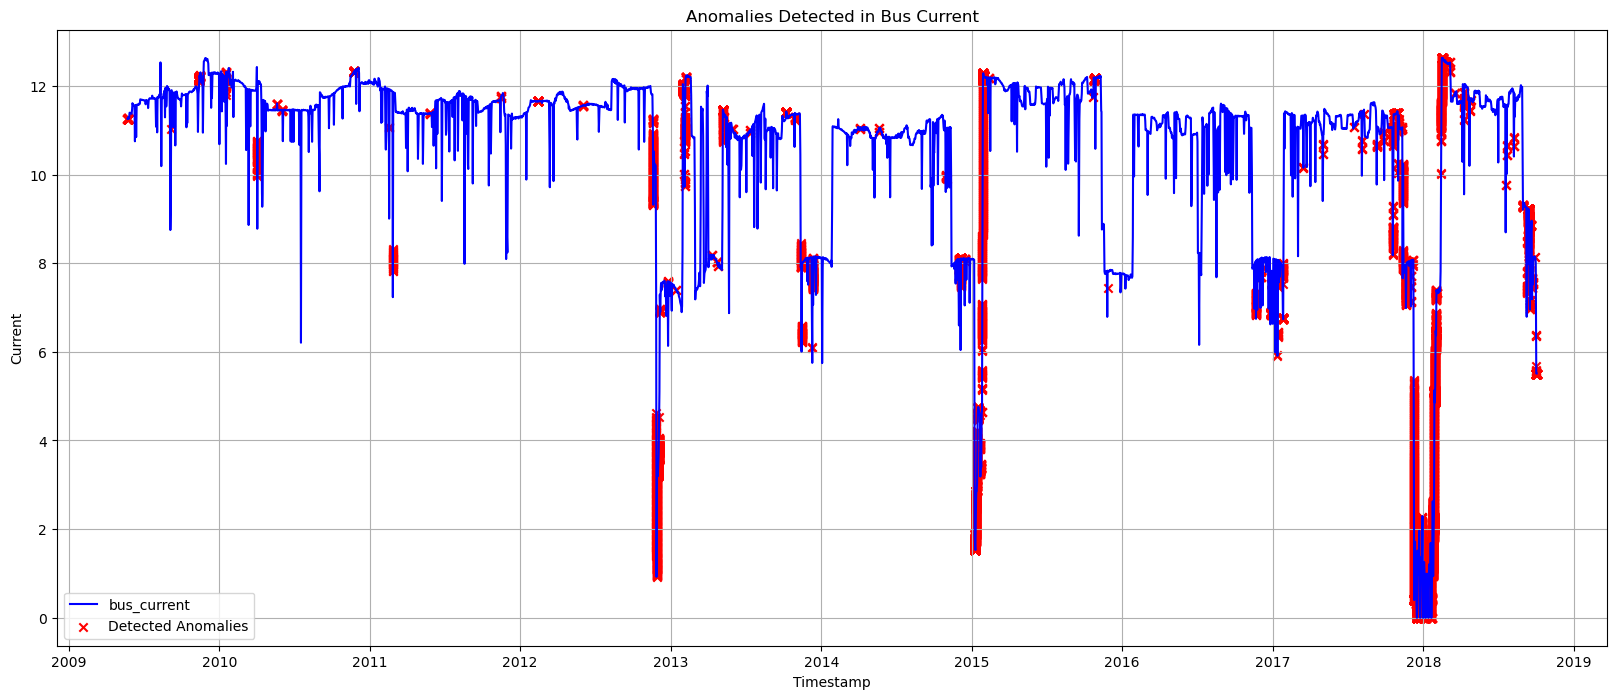

In [57]:
plt.figure(figsize=(20,8))
plt.plot(full_data.index, full_data['bus_current'], label='bus_current', color='blue')
plt.scatter(anomalies.index, anomalies['bus_current'], color='red', label='Detected Anomalies', marker='x')
plt.title('Anomalies Detected in Bus Current')
plt.xlabel('Timestamp')
plt.ylabel('Current')
plt.legend()
plt.grid()
plt.show()

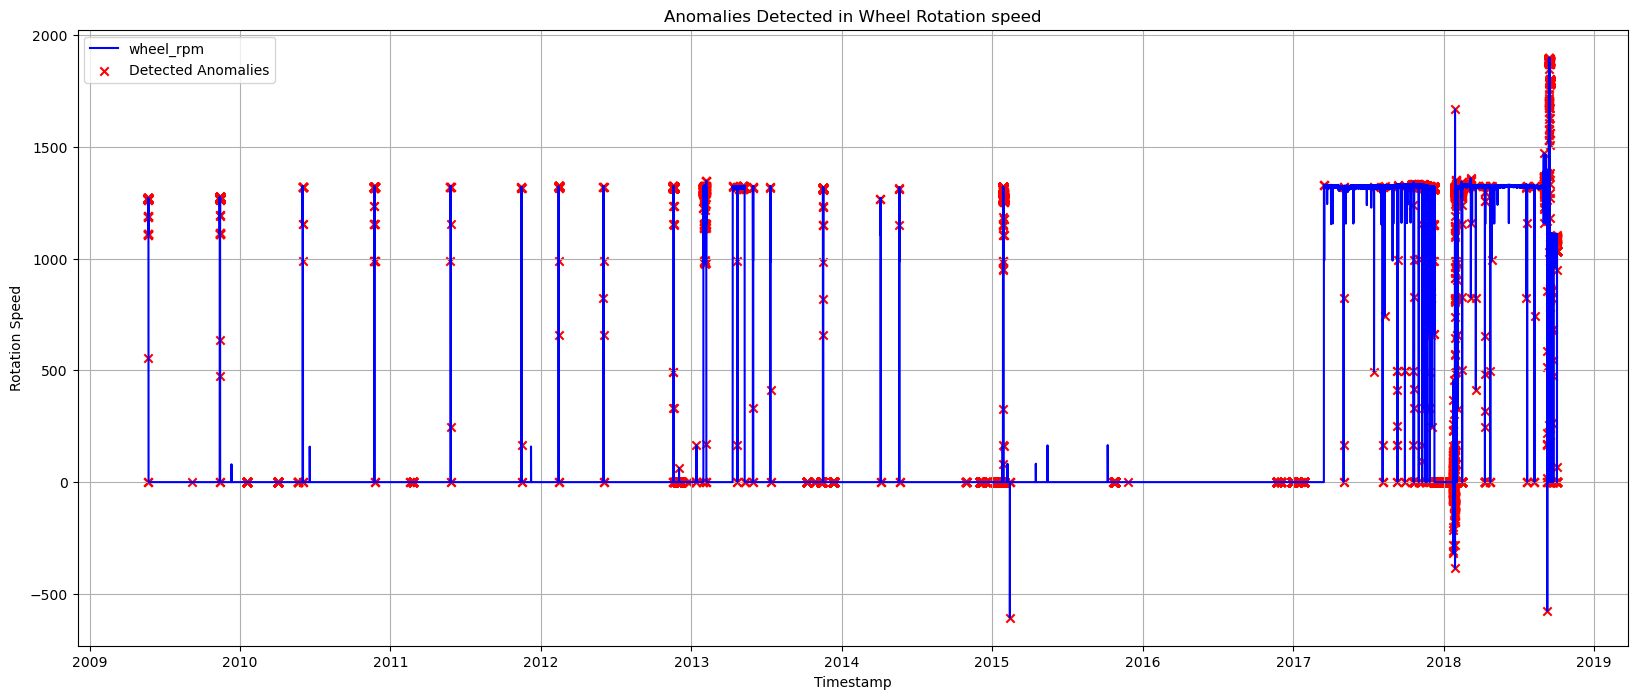

In [58]:
plt.figure(figsize=(20,8))
plt.plot(full_data.index, full_data['wheel_rpm'], label='wheel_rpm', color='blue')
plt.scatter(anomalies.index, anomalies['wheel_rpm'], color='red', label='Detected Anomalies', marker='x')
plt.title('Anomalies Detected in Wheel Rotation speed')
plt.xlabel('Timestamp')
plt.ylabel('Rotation Speed')
plt.legend()
plt.grid()
plt.show()